In [ ]:
import pandas as pd
import numpy as np
import io
 
from google.colab import files 
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
 
#df = pd.read_csv(io.BytesIO(uploaded['Test_data.csv']))
#print (df)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OPEN IIT/train3.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,mode*tempo,month,month_name,regression_popularity,rp>0,rp>1,rp>2,rp>3,year>=2000,year<=1960,year<=1980,year<=2000,year<=2010,year<=2020
0,0,0,2015,0.949,0.235,0.0276,0,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low,110.838,1,January,0,0,0,0,0,0,1,0,0,0,0
1,1,1,15901,0.855,0.456,0.4850,0,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low,152.066,11,November,1,1,0,0,0,1,0,0,0,0,1
2,2,2,9002,0.827,0.495,0.4990,0,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low,-108.004,1,January,0,0,0,0,0,0,1,0,0,0,0
3,3,3,6734,0.654,0.643,0.4690,0,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low,83.636,4,April,1,1,0,0,0,0,0,1,0,0,0
4,4,4,15563,0.738,0.705,0.3110,0,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average,117.260,1,January,2,1,1,0,0,0,0,1,0,0,0


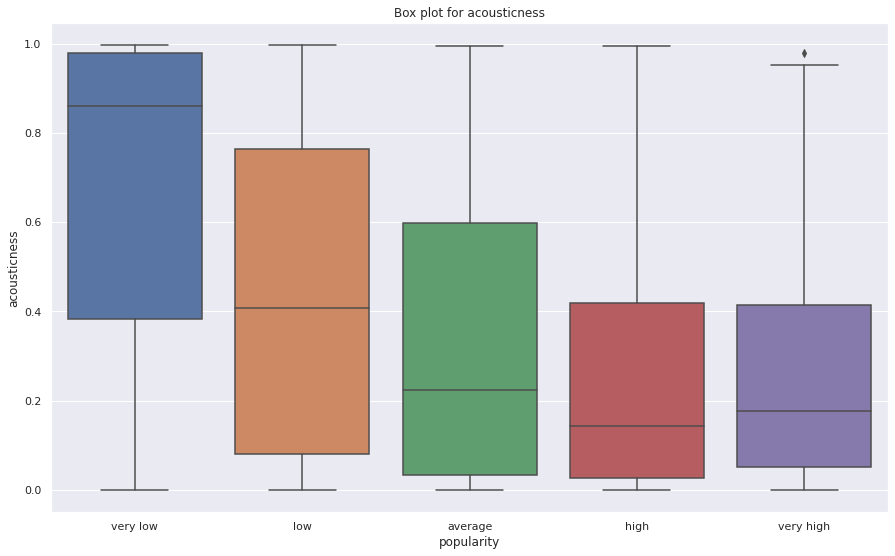

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(15,9)})
ax = sns.boxplot(x="popularity", y="acousticness", data=df).set_title('Box plot for acousticness')



plt.show()


In [ ]:
df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


In [ ]:
from scipy.stats import kendalltau 
  
# Taking values from the above example in Lists 
cat_cols=['explicit','mode']
y=df['popularity']
# Calculating Kendall Rank correlation 
corr, _ = kendalltau(df['month'], y) 
print('month_name: %.5f' % corr) 
corr, _ = kendalltau(df['mode'], y) 
print(' mode: %.5f' % corr) 

month_name: -0.08132
 mode: 0.00367


In [ ]:
df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,mode*tempo,month,month_name
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low,110.838,1,January
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low,152.066,11,November
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low,-108.004,1,January
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low,83.636,4,April
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average,117.260,1,January


In [ ]:
from scipy.stats import spearmanr
num_cols=['acousticness','danceability','energy','instrumentalness','key','liveness','loudness','speechiness','tempo','valence','year','duration-min']
y=df['popularity']
for i in range (len(num_cols)):
  coef, _= spearmanr(df[num_cols[i]], y)
  print("%s" %num_cols[i] +': %f' % coef) 


acousticness: 0.347970
danceability: -0.117860
energy: -0.301132
instrumentalness: 0.230806
key: -0.009673
liveness: 0.102318
loudness: -0.319311
speechiness: 0.130699
tempo: -0.057757
valence: -0.035607
year: -0.414323
duration-min: -0.195697


In [ ]:
num_df=df._get_numeric_data()
num_df.columns
no_of_cols=len(num_df.columns)
columns=list(num_df.columns)
spearman_coeffs_dict={col1:{col2:0 for col2 in columns} for col1 in columns}
for col1 in columns:
    for col2 in columns:
        spearman_coeff, p_value = spearmanr(num_df[col1],num_df[col2])
        spearman_coeffs_dict[col1][col2]=spearman_coeff
        
spearman_coeffs_matrix= pd.DataFrame(spearman_coeffs_dict) 
        
spearman_coeffs_matrix   

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min
id,1.000000,-0.005156,-0.001384,0.014830,0.000545,0.006317,0.005816,0.007774,-0.000212,0.005690,-0.001332,0.015516,0.005706
acousticness,-0.005156,1.000000,-0.223237,-0.749523,0.171720,-0.016293,0.004445,-0.594261,-0.111683,-0.226805,-0.130948,-0.536437,-0.221048
danceability,-0.001384,-0.223237,1.000000,0.182135,-0.255608,0.027893,-0.134703,0.233436,0.258963,-0.014572,0.463994,0.234180,-0.058832
energy,0.014830,-0.749523,0.182135,1.000000,-0.144952,0.032001,0.079758,0.795655,0.155753,0.243172,0.323890,0.468503,0.162725
instrumentalness,0.000545,0.171720,-0.255608,-0.144952,1.000000,-0.005349,-0.030885,-0.316098,-0.108770,-0.046446,-0.152431,-0.230644,0.115354
key,0.006317,-0.016293,0.027893,0.032001,-0.005349,1.000000,-0.011139,0.026023,0.033068,0.014435,0.030120,0.014373,0.007157
liveness,0.005816,0.004445,-0.134703,0.079758,-0.030885,-0.011139,1.000000,0.029311,0.087146,0.001204,-0.009867,-0.069227,-0.076074
loudness,0.007774,-0.594261,0.233436,0.795655,-0.316098,0.026023,0.029311,1.000000,0.083154,0.194499,0.216213,0.553669,0.114661
speechiness,-0.000212,-0.111683,0.258963,0.155753,-0.108770,0.033068,0.087146,0.083154,1.000000,0.074799,0.113943,0.058074,-0.095652
tempo,0.005690,-0.226805,-0.014572,0.243172,-0.046446,0.014435,0.001204,0.194499,0.074799,1.000000,0.126656,0.127825,0.005905


In [ ]:
spearman_coeffs_matrix.to_csv('/content/drive/MyDrive/OPEN IIT/corr_data.csv')

In [ ]:
from scipy.stats import spearmanr
coef, _= spearmanr(df['mode*tempo'], df['popularity'])
print('mode*tempo' +': %f' % coef) 

mode*tempo: -0.027774


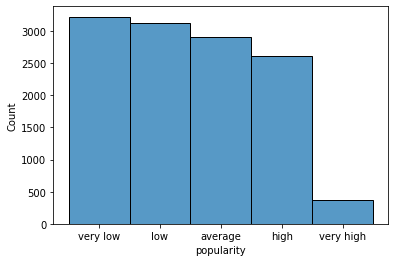

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df, x="popularity", )

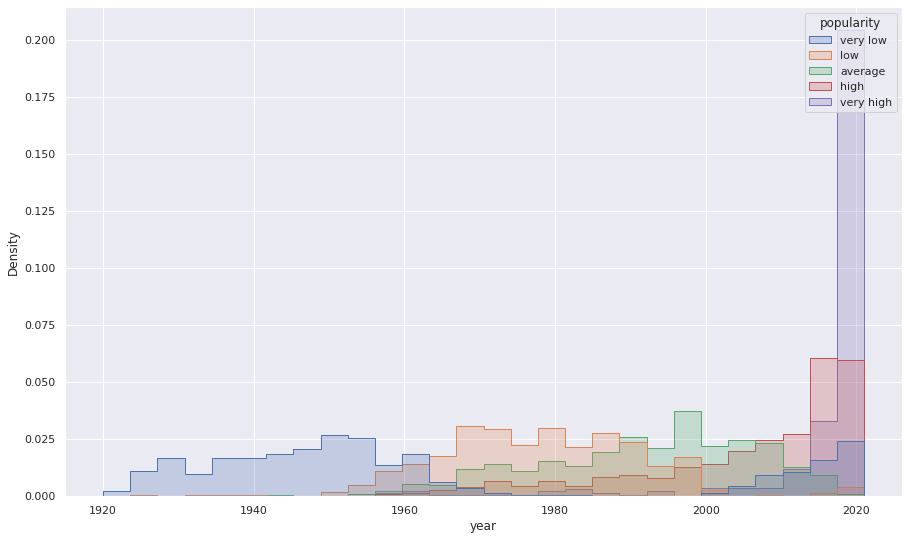

In [ ]:
%matplotlib inline
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(15,9)})
sns.histplot(
    df, x="year", hue="popularity", element="step",
    stat="density", common_norm=False,
)

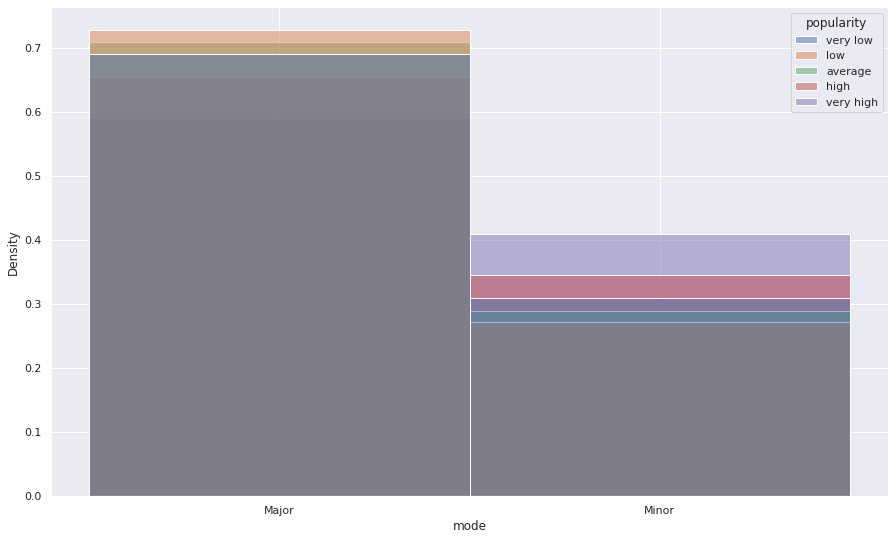

In [ ]:
%matplotlib inline
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(15,9)})
sns.histplot(
    df, x="mode", hue="popularity", element="bars",
    stat="density", common_norm=False,
)

In [ ]:
df['month'] = pd.DatetimeIndex(df['release_date']).month
df2=df.sort_values(by=['month'])
df2.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,mode*tempo,month,month_name
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.5130,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low,110.838,1,January
6844,914,0.964,0.350,0.0972,No,0.0072,0,0.0983,-17.980,Minor,01-11-1967,0.0392,105.311,0.1780,1967,2.2,low,-105.311,1,January
6843,3556,0.948,0.328,0.5250,No,0.9410,5,0.1980,-14.025,Major,01-01-1948,0.0458,79.851,0.2660,1948,1.4,very low,79.851,1,January
6842,8191,0.783,0.618,0.2730,No,0.1960,0,0.1080,-9.242,Major,01-01-1963,0.0324,80.493,0.5030,1963,3.3,low,80.493,1,January
6840,13333,0.269,0.673,0.6870,Yes,0.0000,6,0.1810,-5.295,Minor,01-03-2019,0.0623,96.964,0.5240,2019,3.5,high,-96.964,1,January


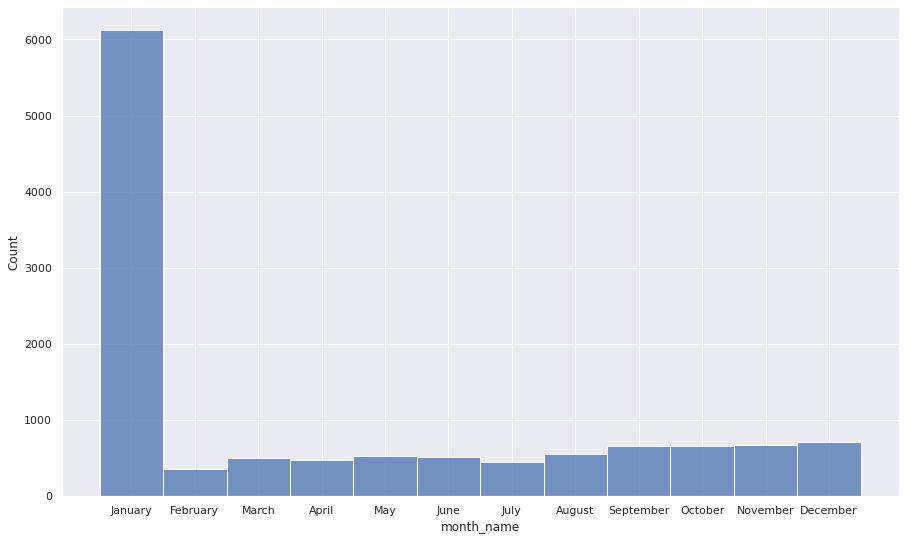

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df2, x="month_name" )

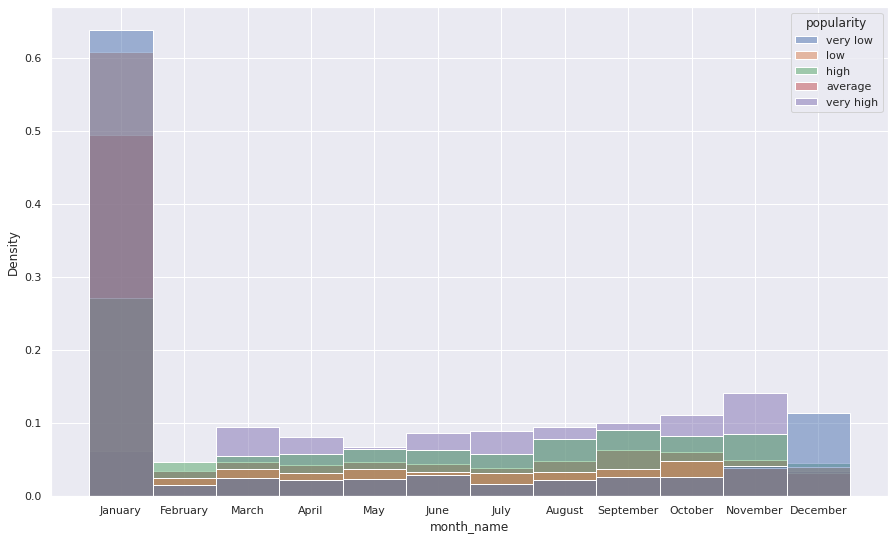

In [ ]:
%matplotlib inline
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(15,9)})
sns.histplot(
    df2, x="month_name", hue="popularity", element="bars",
    stat="density", common_norm=False,
)

In [ ]:
df['month_name'] = pd.DatetimeIndex(df['release_date']).month_name()
df['month_name'] = pd.DatetimeIndex(df['release_date']).month_name()
df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,mode*tempo,month,month_name
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low,110.838,1,January
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low,152.066,11,November
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low,-108.004,1,January
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low,83.636,4,April
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average,117.260,1,January


In [ ]:
df.to_csv('/content/drive/MyDrive/OPEN IIT/train2.csv')

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [ ]:
df['year>=2000'] = df['year'].apply(lambda x: 1 if x>=2000 else 0)

In [ ]:
df.head()

,Unnamed: 0,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,mode*tempo,month,month_name,year>=2000
0,0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low,110.838,1,January,0
1,1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low,152.066,11,November,1
2,2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low,-108.004,1,January,0
3,3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low,83.636,4,April,0
4,4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average,117.260,1,January,0


In [ ]:
 corr, _= spearmanr(df['year<=1960'], df['popularity']) 
print(' year<=2000: %.5f' % corr) 

 year<=2000: 0.56885


In [ ]:
df['year<=1960'] = df['year'].apply(lambda x: 1 if x<=1960 else 0)

In [ ]:
df['year<=1980'] = df['year'].apply(lambda x: 1 if x<=1980 and x>1960 else 0)

In [ ]:
df['year<=2000'] = df['year'].apply(lambda x: 1 if x<=2000 and x>1980 else 0)

In [ ]:
df['year<=2010'] = df['year'].apply(lambda x: 1 if x<=2010 and x>2000 else 0)
df['year<=2020'] = df['year'].apply(lambda x: 1 if x<=2020 and x>2010 else 0)

In [ ]:
df.head()

,Unnamed: 0,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,mode*tempo,month,month_name,year>=2000,year<=1960,year<=1980,year<=2000,year<=2010,year<=2020
0,0,2015,0.949,0.235,0.0276,0,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low,110.838,1,January,0,1,0,0,0,0
1,1,15901,0.855,0.456,0.4850,0,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low,152.066,11,November,1,0,0,0,0,1
2,2,9002,0.827,0.495,0.4990,0,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low,-108.004,1,January,0,1,0,0,0,0
3,3,6734,0.654,0.643,0.4690,0,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low,83.636,4,April,0,0,1,0,0,0
4,4,15563,0.738,0.705,0.3110,0,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average,117.260,1,January,0,0,1,0,0,0


In [ ]:
df['explicit']=df['explicit'].apply(lambda x: 0 if x=="No" else 1)

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'acousticness', 'danceability', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'release_date', 'speechiness', 'tempo', 'valence', 'year',
       'duration-min', 'popularity', 'mode*tempo', 'month', 'month_name',
       'year>=2000', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020'],
      dtype='object')

In [ ]:
target = {
  "very low": 1,
  "low": 2,
  "average": 3,
  "high": 4,
  "very high": 5
}
df['regression_popularity']=df['popularity'].apply(lambda x: target[x])

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,mode*tempo,month,month_name,year>=2000,year<=1960,year<=1980,year<=2000,year<=2010,year<=2020,regression_popularity
0,0,0,2015,0.949,0.235,0.0276,0,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low,110.838,1,January,0,1,0,0,0,0,1
1,1,1,15901,0.855,0.456,0.4850,0,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low,152.066,11,November,1,0,0,0,0,1,2
2,2,2,9002,0.827,0.495,0.4990,0,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low,-108.004,1,January,0,1,0,0,0,0,1
3,3,3,6734,0.654,0.643,0.4690,0,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low,83.636,4,April,0,0,1,0,0,0,2
4,4,4,15563,0.738,0.705,0.3110,0,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average,117.260,1,January,0,0,1,0,0,0,3


**EXPERIMENT** 1


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 
  

label_encoder = preprocessing.LabelEncoder()

X=df[[ 'acousticness', 'danceability',
       'explicit', 'instrumentalness', 'key', 'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y=df['popularity']
label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(multi_class='multinomial',max_iter=000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.59


array([[292,  53, 224,   0,  19],
       [168, 271,  68,   0,  33],
       [157,   7, 394,   0,  63],
       [  5,  67,   1,   0,   1],
       [ 31,  56,  55,   0, 481]])

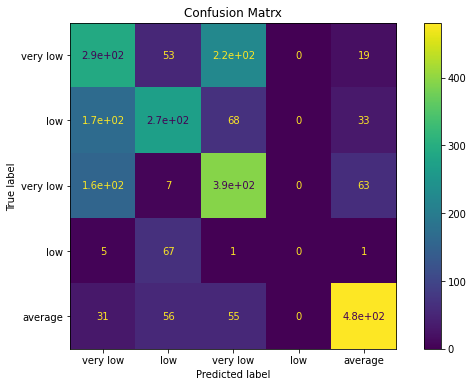

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(model, X_test, y_test, display_labels= df.popularity, ax = ax)
disp.confusion_matrix

In [ ]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
X=df[[ 'acousticness', 'danceability',
       'explicit', 'instrumentalness', 'key', 'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y=df['popularity']
label_encoder = preprocessing.LabelEncoder()
y=label_encoder.fit_transform(y)
sc_1=StandardScaler()
sc_1.fit(X)
X=pd.DataFrame(sc_1.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = lgb.LGBMClassifier()
d_train=lgb.Dataset(X_train, label=y_train)

params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=10
params['num_class']=5 #no.of unique values in the target class not inclusive of the end value
#training the model
clf=lgb.train(params,d_train,200)
# predict the results
y_pred=clf.predict(X_test)
y_pred = [np.argmax(line) for line in y_pred]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.5899


In [ ]:
print(y_pred[1])

4


In [ ]:
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score,f1_score
f1_score(y_pred,y_test,average=None).mean()

0.482900107162315

USING ONE HOT ENCODING

DEEP LEARNING

In [ ]:
import pandas as pd
import numpy as np
import io

from google.colab import files 
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

Mounted at /content/drive
/device:GPU:0


In [ ]:
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# load dataset
df = pd.read_csv('/content/drive/MyDrive/OPEN IIT/train2.csv')
X=df[[ 'acousticness', 'danceability',
       'explicit', 'instrumentalness', 'key', 'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year']]
Y=df['popularity']
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(32, input_dim=11, activation='relu'))
	model.add(Dense(5, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=4, verbose=1)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/20
2446/2446 [==============================] - 5s 2ms/step - loss: 116.7584 - accuracy: 0.2367
Epoch 2/20
2446/2446 [==============================] - 5s 2ms/step - loss: 4.3075 - accuracy: 0.2692
Epoch 3/20
2446/2446 [==============================] - 5s 2ms/step - loss: 3.8462 - accuracy: 0.2892
Epoch 4/20
2446/2446 [==============================] - 5s 2ms/step - loss: 3.6779 - accuracy: 0.3108
Epoch 5/20
2446/2446 [==============================] - 5s 2ms/step - loss: 3.3015 - accuracy: 0.3126
Epoch 6/20
2446/2446 [==============================] - 5s 2ms/step - loss: 3.5024 - accuracy: 0.3146
Epoch 7/20
2446/2446 [==============================] - 5s 2ms/step - loss: 3.4343 - accuracy: 0.3036
Epoch 8/20
2446/2446 [==============================] - 5s 2ms/step - loss: 3.4131 - accuracy: 0.3164
Epoch 9/20
2446/2446 [==============================] - 5s 2ms/step - loss: 3.0758 - accuracy: 0.3205
Epoch 10/20
2446/2446 [==============================] - 5s 2ms/step - loss: 3.2

In [ ]:
df.shape

(12227, 30)

KNN

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('/content/drive/MyDrive/OPEN IIT/train2.csv')
X=df[[ 'acousticness', 'danceability',
       'explicit', 'instrumentalness', 'key', 'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y=df['popularity']
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)
MinMaxScaler = MinMaxScaler()
X = MinMaxScaler.fit_transform(X)
X

array([[0.9528112 , 0.23979592, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.85843359, 0.46530612, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.83032111, 0.50510204, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.32931657, 0.5622449 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.12248904, 0.06204082, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.03815161, 0.39693878, 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[299 101 143   4  19]
 [137 285  42  17  24]
 [247  50 312   1  72]
 [  5  61   4   6   0]
 [ 34  66  61   0 456]]
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.53      0.46       566
           1       0.51      0.56      0.53       505
           2       0.56      0.46      0.50       682
           3       0.21      0.08      0.12        76
           4       0.80      0.74      0.77       617

    accuracy                           0.56      2446
   macro avg       0.50      0.47      0.48      2446
weighted avg       0.56      0.56      0.55      2446

Accuracy: 0.5551921504497138


In [ ]:
!pip install mord

  Created wheel for mord: filename=mord-0.6-cp37-none-any.whl size=6007 sha256=11b5df416fb00a169b3018376adbb95796c3527bdc12e957cbb385cc2e9ecf91
  Stored in directory: /root/.cache/pip/wheels/98/14/b2/244c2cec93a0c6edb29b488bd6b2710ded7e9d457033b86366
Successfully built mord


In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from mord import LogisticAT
from sklearn.model_selection import train_test_split
import sklearn.preprocessing 
X=df[[ 'acousticness', 'danceability',
       'explicit', 'instrumentalness', 'key', 'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
df['regression_popularity']=df['regression_popularity']-1
y=df['regression_popularity']
label_encoder = sklearn.preprocessing.LabelEncoder()
y=label_encoder.fit_transform(y)
sc_1=sklearn.preprocessing.StandardScaler()
sc_1.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)
model_ordinal = LogisticAT(alpha=0)
print(y)

[0 1 0 ... 1 3 3]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
MAE = make_scorer(mean_absolute_error)
folds = 5
MAE_ordinal = cross_val_score(model_ordinal,
    X_train,
    y_train,
    cv=folds,
    scoring=MAE)
print('Ordered logistic regression: ', np.mean(MAE_ordinal))

Ordered logistic regression:  0.5655856016836421


In [ ]:
from sklearn.metrics import accuracy_score

def acc_fun(target_true, target_fit):
    target_fit = np.round(target_fit)
    target_fit.astype('int')
    return accuracy_score(target_true, target_fit)

acc = make_scorer(acc_fun)
folds = 5

In [ ]:
from sklearn.metrics import accuracy_score
def acc_fun(target_true, target_fit):
    target_fit = np.round(target_fit)
    target_fit.astype('int')
    return accuracy_score(target_true, target_fit)

acc = make_scorer(acc_fun)
folds = 5
acc_ordinal = cross_val_score(model_ordinal,
    X,
    y,
    cv=folds,
    scoring=acc)
print('Ordered logistic regression: ', np.mean(acc_ordinal))

Ordered logistic regression:  0.5441239902549466


In [ ]:
print(X_train)

       acousticness  danceability  explicit  ...  year<=2000  year<=2010  year<=2020
1589        0.00753         0.371         0  ...           0           1           0
11169       0.62500         0.712         0  ...           0           0           0
566         0.89400         0.202         0  ...           0           0           0
406         0.99000         0.543         0  ...           0           0           0
5615        0.86400         0.540         0  ...           0           0           0
...             ...           ...       ...  ...         ...         ...         ...
10955       0.99400         0.278         0  ...           0           0           0
905         0.01690         0.827         1  ...           0           0           1
5192        0.08880         0.780         1  ...           1           0           0
12172       0.06980         0.357         0  ...           0           0           0
235         0.11700         0.916         1  ...           0     

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
df = pd.read_csv('/content/drive/MyDrive/OPEN IIT/train2.csv')
X=df[[ 'acousticness', 'danceability',
       'explicit', 'instrumentalness', 'key', 'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
df['regression_popularity']=df['regression_popularity']-1
y=df['regression_popularity']
sc_1=sklearn.preprocessing.StandardScaler()
sc_1.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state = 1)
regr = RandomForestRegressor(max_depth=16,criterion='mae', random_state=0)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
print(y_pred)



[1.89 2.   3.   ... 3.   0.06 1.3 ]


In [ ]:
print((y_test))

1986    2
9184    1
345     2
7636    3
3281    3
       ..
1911    0
8626    0
7132    3
8054    0
4057    2
Name: regression_popularity, Length: 1223, dtype: int64


In [ ]:
import numpy as np
y_pred=np.round(y_pred)
for i in range (len(y_pred)):
  if y_pred[i]<0:
    y_pred[i]=0
                

In [ ]:
accuracy=accuracy_score(y_pred, y_test)
print('RF Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

RF Model accuracy score: 0.5944


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

df = pd.read_csv('/content/drive/MyDrive/OPEN IIT/train2.csv')
X=df[[ 'acousticness', 'danceability',
       'explicit', 'instrumentalness', 'key', 'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
df['regression_popularity']=df['regression_popularity']-1
y=df['regression_popularity']
sc_1=sklearn.preprocessing.StandardScaler()
sc_1.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state = 1)
regr = RandomForestRegressor(max_depth=16,criterion='mae', random_state=0)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
print(y_pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import sklearn.preprocessing 
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/OPEN IIT/train3.csv')
X=df[[ 'energy', 'danceability',
       'explicit', 'instrumentalness',  'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=2000' ,'year<=2010',
       'year<=2020']]

y=df['regression_popularity']-1
sc_1=sklearn.preprocessing.StandardScaler()
sc_1.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)


FileNotFoundError: ignored

In [ ]:
from sklearn.base import clone


class OrdinalClassifier():
    
    def __init__(self, clf):
        self.clf = clf
        self.clfs = {}
    
    def fit(self, X, y):
        self.unique_class = np.sort(np.unique(y))
        if self.unique_class.shape[0] > 2:
            for i in range(self.unique_class.shape[0]-1):
                # for each k - 1 ordinal value we fit a binary classification problem
                binary_y = (y > self.unique_class[i]).astype(np.uint8)
                clf = clone(self.clf)
                clf.fit(X, binary_y)
                self.clfs[i] = clf
    
    def predict_proba(self, X):
        clfs_predict = {k:self.clfs[k].predict_proba(X) for k in self.clfs}
        predicted = []
        for i,y in enumerate(self.unique_class):
            if i == 0:
                # V1 = 1 - Pr(y > V1)
                predicted.append(1 - clfs_predict[y][:,1])
            elif y in clfs_predict:
                # Vi = Pr(y > Vi-1) - Pr(y > Vi)
                 predicted.append(clfs_predict[y-1][:,1] - clfs_predict[y][:,1])
            else:
                # Vk = Pr(y > Vk-1)
                predicted.append(clfs_predict[y-1][:,1])
        return np.vstack(predicted).T
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
clf = OrdinalClassifier(RandomForestClassifier(max_depth=8))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(y_pred)

[1 2 3 ... 1 2 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('RF Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

RF Model accuracy score: 0.6169


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[474  68  29  46   0]
 [ 77 462 132  11   0]
 [ 19 209 284  54   0]
 [  6  71 139 289   0]
 [  0   4   3  69   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       617
           1       0.57      0.68      0.62       682
           2       0.48      0.50      0.49       566
           3       0.62      0.57      0.59       505
           4       0.00      0.00      0.00        76

    accuracy                           0.62      2446
   macro avg       0.50      0.50      0.50      2446
weighted avg       0.61      0.62      0.61      2446

Accuracy: 0.6169255928045789


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **TRAIN3**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import sklearn.preprocessing 
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/OPEN IIT/train3.csv')


df.head()


,Unnamed: 0,Unnamed: 0.1,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,mode*tempo,month,month_name,regression_popularity,rp>0,rp>1,rp>2,rp>3,year>=2000,year<=1960,year<=1980,year<=2000,year<=2010,year<=2020
0,0,0,2015,0.949,0.235,0.0276,0,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low,110.838,1,January,0,0,0,0,0,0,1,0,0,0,0
1,1,1,15901,0.855,0.456,0.4850,0,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low,152.066,11,November,1,1,0,0,0,1,0,0,0,0,1
2,2,2,9002,0.827,0.495,0.4990,0,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low,-108.004,1,January,0,0,0,0,0,0,1,0,0,0,0
3,3,3,6734,0.654,0.643,0.4690,0,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low,83.636,4,April,1,1,0,0,0,0,0,1,0,0,0
4,4,4,15563,0.738,0.705,0.3110,0,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average,117.260,1,January,2,1,1,0,0,0,0,1,0,0,0


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/OPEN IIT/train2.csv')
df2.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,mode*tempo,month,month_name,year>=2000,year<=1960,year<=1980,year<=2000,year<=2010,year<=2020,regression_popularity
0,0,0,0,2015,0.949,0.235,0.0276,0,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low,110.838,1,January,0,1,0,0,0,0,1
1,1,1,1,15901,0.855,0.456,0.4850,0,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low,152.066,11,November,1,0,0,0,0,1,2
2,2,2,2,9002,0.827,0.495,0.4990,0,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low,-108.004,1,January,0,1,0,0,0,0,1
3,3,3,3,6734,0.654,0.643,0.4690,0,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low,83.636,4,April,0,0,1,0,0,0,2
4,4,4,4,15563,0.738,0.705,0.3110,0,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average,117.260,1,January,0,0,1,0,0,0,3


In [ ]:
df['year>=2000']=df2['year>=2000']
df['year<=1960']=df2['year<=1960']
df['year<=1980']=df2['year<=1980']
df['year<=2000']=df2['year<=2000']
df['year<=2010']=df2['year<=2010']
df['year<=2020']=df2['year<=2020']
df.head()

,Unnamed: 0,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,mode*tempo,month,month_name,regression_popularity,rp>0,rp>1,rp>2,rp>3,year>=2000,year<=1960,year<=1980,year<=2000,year<=2010,year<=2020
0,0,2015,0.949,0.235,0.0276,0,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low,110.838,1,January,0,0,0,0,0,0,1,0,0,0,0
1,1,15901,0.855,0.456,0.4850,0,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low,152.066,11,November,1,1,0,0,0,1,0,0,0,0,1
2,2,9002,0.827,0.495,0.4990,0,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low,-108.004,1,January,0,0,0,0,0,0,1,0,0,0,0
3,3,6734,0.654,0.643,0.4690,0,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low,83.636,4,April,1,1,0,0,0,0,0,1,0,0,0
4,4,15563,0.738,0.705,0.3110,0,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average,117.260,1,January,2,1,1,0,0,0,0,1,0,0,0


In [ ]:
df.to_csv('/content/drive/MyDrive/OPEN IIT/train3.csv')


 RP>0

In [ ]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau 
num_cols=['acousticness','danceability','energy','instrumentalness','key','liveness','loudness','speechiness','tempo','valence','year<=1960','year<=1980','year<=2000','year<=2010','year<=2020','duration-min']
y=df['popularity']
for i in range (len(num_cols)):
  coef, _= kendalltau(df[num_cols[i]], df['rp>0'])
  print("%s" %num_cols[i] +': %f' % coef) 

acousticness: -0.307524
danceability: 0.095557
energy: 0.258062
instrumentalness: -0.211924
key: 0.004377
liveness: -0.085746
loudness: 0.254356
speechiness: -0.127572
tempo: 0.059584
valence: 0.036500
year<=1960: -0.684066
year<=1980: 0.175136
year<=2000: 0.335664
year<=2010: 0.117379
year<=2020: 0.064780
duration-min: 0.153891


RP>1 YASHVI


In [ ]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau 
num_cols=['acousticness','danceability','energy','instrumentalness','key','liveness','loudness','speechiness','tempo','valence','year<=1960','year<=1980','year<=2000','year<=2010','year<=2020','duration-min']
y=df['popularity']
for i in range (len(num_cols)):
  coef, _= kendalltau(df[num_cols[i]], df['rp>1'])
  print("%s" %num_cols[i] +': %f' % coef) 

acousticness: -0.273254
danceability: 0.161813
energy: 0.239747
instrumentalness: -0.243264
key: 0.013422
liveness: -0.078468
loudness: 0.336476
speechiness: -0.026408
tempo: 0.048366
valence: -0.007928
year<=1960: -0.454539
year<=1980: -0.170304
year<=2000: 0.117813
year<=2010: 0.269697
year<=2020: 0.292054
duration-min: 0.112179


RP>2 PRATYASHA

In [ ]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau 
num_cols=['acousticness','danceability','energy','instrumentalness','key','liveness','loudness','speechiness','tempo','valence','year<=1960','year<=1980','year<=2000','year<=2010','year<=2020','duration-min']
y=df['popularity']
for i in range (len(num_cols)):
  coef, _= kendalltau(df[num_cols[i]], df['rp>2'])
  print("%s" %num_cols[i] +': %f' % coef) 

acousticness: -0.197159
danceability: 0.164314
energy: 0.169225
instrumentalness: -0.225341
key: 0.008047
liveness: -0.045384
loudness: 0.301062
speechiness: 0.043589
tempo: 0.050401
valence: -0.043587
year<=1960: -0.275987
year<=1980: -0.186341
year<=2000: -0.123337
year<=2010: 0.108803
year<=2020: 0.509228
duration-min: 0.025810


In [ ]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau 
num_cols=['acousticness','danceability','energy','instrumentalness','key','liveness','loudness','speechiness','tempo','valence','year<=1960','year<=1980','year<=2000','year<=2010','year<=2020','duration-min']
y=df['popularity']
for i in range (len(num_cols)):
  coef, _= kendalltau(df[num_cols[i]], df['rp>3'])
  print("%s" %num_cols[i] +': %f' % coef) 

acousticness: -0.050402
danceability: 0.100264
energy: 0.041412
instrumentalness: -0.101452
key: 0.008555
liveness: -0.017496
loudness: 0.116768
speechiness: 0.052302
tempo: 0.009540
valence: -0.017017
year<=1960: -0.085986
year<=1980: -0.081573
year<=2000: -0.089314
year<=2010: -0.043979
year<=2020: 0.297535
duration-min: -0.037455


In [ ]:
X=df[[ 'acousticness', 'danceability',
       'explicit', 'instrumentalness',
       'speechiness', 
       'duration-min', 'year<=1960','year<=1980','year>=2000', 
       ]]
sc_1=sklearn.preprocessing.StandardScaler()
sc_1.fit(X)
y=df['rp>0']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf = RandomForestClassifier( n_estimators=500,random_state=1,class_weight='balanced')

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


Confusion Matrix:
[[ 461  156]
 [  88 1741]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       617
           1       0.92      0.95      0.93      1829

    accuracy                           0.90      2446
   macro avg       0.88      0.85      0.86      2446
weighted avg       0.90      0.90      0.90      2446

Accuracy: 0.9002452984464432


In [ ]:
X=df[[ 'loudness', 'danceability',
       'explicit', 'instrumentalness',
       'speechiness', 
       'duration-min', 'year<=2020' 
       ]]
sc_1=sklearn.preprocessing.StandardScaler()
sc_1.fit(X)
y=df['rp>3']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf = RandomForestClassifier( n_estimators=500,random_state=1,class_weight={0:1,1:500})

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


Confusion Matrix:
[[2364    6]
 [  75    1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2370
           1       0.14      0.01      0.02        76

    accuracy                           0.97      2446
   macro avg       0.56      0.51      0.50      2446
weighted avg       0.94      0.97      0.95      2446

Accuracy: 0.9668847097301717


In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
 
# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable
	y = LabelEncoder().fit_transform(y)
	return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
	return scores
 
# define the location of the dataset
df=pd.read_csv( '/content/drive/MyDrive/OPEN IIT/train3.csv')
# load the dataset
X=df[[ 'loudness', 'danceability',
       'explicit', 'instrumentalness',
       'speechiness', 
       'duration-min', 'year<=2020' ,'year<=2010',
       ]]
sc_1=StandardScaler()
sc_1.fit(X)
y=df['rp>3']
# define the model
weights = {0:1.0, 1:8.0}
model = RandomForestClassifier(n_estimators=1000, class_weight=weights)
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean F1: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean F1: 0.096 (0.069)


Counter({0: 11858, 1: 369})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 369, 1: 369})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


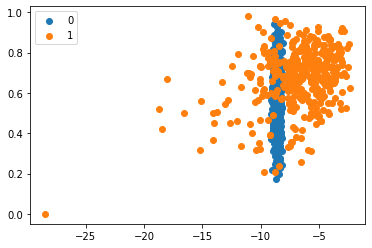

In [ ]:
# Undersample imbalanced dataset with NearMiss-2
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# define dataset
X=df[[ 'loudness', 'danceability',
       'explicit', 'instrumentalness',
       'speechiness', 
       'duration-min', 'year<=2020' ,'year<=2010',
       ]]

y=df['rp>3']
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=16)
# transform the dataset
X, y = undersample.fit_resample(X, y)
sc_1=StandardScaler()
sc_1.fit(X)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf = RandomForestClassifier( n_estimators=500,random_state=1,class_weight={0:1,1:500})
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[66  2]
 [ 4 76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.97      0.95      0.96        80

    accuracy                           0.96       148
   macro avg       0.96      0.96      0.96       148
weighted avg       0.96      0.96      0.96       148

Accuracy: 0.9594594594594594


In [ ]:
X=df[[ 'loudness', 'danceability',
       'explicit', 'instrumentalness',
       'speechiness', 
       'duration-min', 'year<=2020' ,'year<=2010',
       ]]

y=df['rp>3']
y_pred=clf.predict(X)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y,y_pred)
print("Accuracy:",result2)


Confusion Matrix:
[[5698 6160]
 [   4  365]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65     11858
           1       0.06      0.99      0.11       369

    accuracy                           0.50     12227
   macro avg       0.53      0.73      0.38     12227
weighted avg       0.97      0.50      0.63     12227

Accuracy: 0.495869796352335


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
df=pd.read_csv( '/content/drive/MyDrive/OPEN IIT/train3.csv')
X=df[[ 'loudness', 'danceability',
       'explicit', 'instrumentalness',
       'speechiness', 
       'duration-min', 'year<=2020' ,'year<=2010',
       ]]
 
y=df['rp>3']
sc_1=StandardScaler()
sc_1.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)
X_train, y_train = oversample.fit_resample(X_train, y_train)
 
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf = RandomForestClassifier( n_estimators=1000,max_depth=10,random_state=1,class_weight='balanced_subsample')
 
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix:
[[2075  295]
 [  14   62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2370
           1       0.17      0.82      0.29        76

    accuracy                           0.87      2446
   macro avg       0.58      0.85      0.61      2446
weighted avg       0.97      0.87      0.91      2446

Accuracy: 0.8736713000817662


FOR RP>3 BEST RESULTS


In [ ]:
X=df[[ 'loudness', 'danceability',
       'explicit', 'instrumentalness',
       'speechiness', 
       'duration-min', 'year<=2020' ,'year<=2010',
       ]]

y=df['rp>3']
y_pred=clf.predict(X)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[11699   159]
 [    9   360]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11858
           1       0.69      0.98      0.81       369

    accuracy                           0.99     12227
   macro avg       0.85      0.98      0.90     12227
weighted avg       0.99      0.99      0.99     12227

Accuracy: 0.9862599165780649


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
X=df[[ 'loudness', 'danceability',
       'explicit', 'instrumentalness',
       'year<=1960','year<=2000','year<=1980','year<=2010','year<=2020',
       'duration-min'
       ]]

y=df['rp>2']
sc=StandardScaler()
sc.fit(X)
X=pd.DataFrame(sc.fit_transform(X))
clf = RandomForestClassifier( n_estimators=500,random_state=1,class_weight="balanced_subsample")
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1735  130]
 [ 238  343]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1865
           1       0.73      0.59      0.65       581

    accuracy                           0.85      2446
   macro avg       0.80      0.76      0.78      2446
weighted avg       0.84      0.85      0.84      2446

Accuracy: 0.8495502861815208


In [ ]:
import numpy as np
from collections import Counter
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer,load_boston,load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
d_train=lgb.Dataset(X_train, label=y_train)
#Specifying the parameter
params={}
params['learning_rate']=0.02
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=10
params['is_unbalance']='true'
#train the model 
clf=lgb.train(params,d_train,500) #train the model on 100 epocs
#prediction on the test set
y_pred=clf.predict(X_test)
y_pred=y_pred.round(0)
#converting from float to integer
y_pred=y_pred.astype(int)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1535  330]
 [ 121  460]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1865
           1       0.58      0.79      0.67       581

    accuracy                           0.82      2446
   macro avg       0.75      0.81      0.77      2446
weighted avg       0.85      0.82      0.82      2446

Accuracy: 0.8156173344235487


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
import numpy as np
from collections import Counter
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer,load_boston,load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
df=pd.read_csv( '/content/drive/MyDrive/OPEN IIT/train3.csv')
X=df[[ 'loudness', 'danceability',
       'explicit', 'instrumentalness',
       'year<=1960','year<=2000','year<=1980','year<=2010','year<=2020',
       'duration-min'
       ]]

 
y=df['rp>2']
sc_1=StandardScaler()
sc_1.fit(X)
X=pd.DataFrame(sc_1.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)
X_train, y_train = oversample.fit_resample(X_train, y_train)
 
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf = RandomForestClassifier( n_estimators=1000,max_depth=10,random_state=1,class_weight='balanced_subsample')
 
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix:
[[1581  284]
 [ 137  444]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1865
           1       0.61      0.76      0.68       581

    accuracy                           0.83      2446
   macro avg       0.77      0.81      0.78      2446
weighted avg       0.85      0.83      0.83      2446

Accuracy: 0.8278822567457073


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
import numpy as np
from collections import Counter
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer,load_boston,load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
df=pd.read_csv( '/content/drive/MyDrive/OPEN IIT/train3.csv')
X=df[[ 'loudness', 'danceability',
        'instrumentalness','explicit','key',
       'year<=1960','year>=2000','year<=2010','year<=2020',
       'duration-min','energy','acousticness'
       ]]

 
y=df['rp>2']
sc_1=StandardScaler()
sc_1.fit(X)
X=pd.DataFrame(sc_1.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state = 1)
X_train, y_train = oversample.fit_resample(X_train, y_train)
d_train=lgb.Dataset(X_train, label=y_train)
#Specifying the parameter
params={}
params['learning_rate']=0.02
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=10

#train the model 
clf=lgb.train(params,d_train,300) #train the model on 100 epocs
#prediction on the test set
y_pred=clf.predict(X_test)
y_pred=y_pred.round(0)
#converting from float to integer
y_pred=y_pred.astype(int)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix:
[[2046  280]
 [ 205  526]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2326
           1       0.65      0.72      0.68       731

    accuracy                           0.84      3057
   macro avg       0.78      0.80      0.79      3057
weighted avg       0.85      0.84      0.84      3057

Accuracy: 0.841347726529277


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


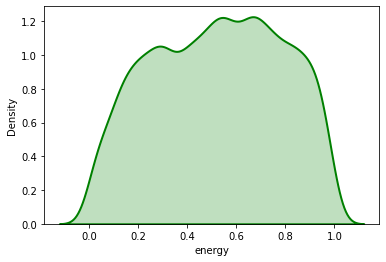

In [ ]:
import numpy as np 
from scipy import stats 
  
# plotting modules 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.distplot(df['energy'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green") 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


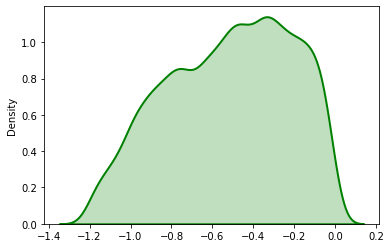

In [ ]:
fitted_data, fitted_lambda = stats.boxcox(df['energy']) 
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green") 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


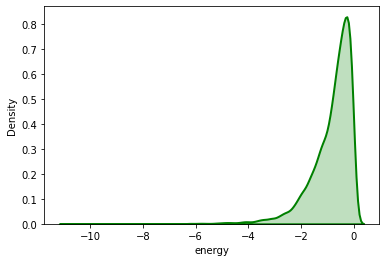

In [ ]:
fitted_data=np.log(df['energy']).astype('float')
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green") 

In [ ]:
df['liveness']=fitted_data

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
df=pd.read_csv( '/content/drive/MyDrive/OPEN IIT/train3.csv')
X=df[[ 'loudness', 'danceability',
       'explicit', 'instrumentalness',
       'speechiness', 
       'duration-min', 'year<=2020' ,'year<=2010',
       ]]
 
y=df['rp>3']
sc_1=StandardScaler()
sc_1.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)
X_train, y_train = oversample.fit_resample(X_train, y_train)
 
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf = RandomForestClassifier( n_estimators=1000,max_depth=10,random_state=1,class_weight='balanced_subsample')
 
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

In [ ]:
!git clone https://github.com/gregversteeg/gaussianize.git

Cloning into 'gaussianize'...
remote: Enumerating objects: 68, done.
remote: Total 68 (delta 0), reused 0 (delta 0), pack-reused 68
Unpacking objects: 100% (68/68), done.


In [ ]:
import gaussianize as g


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 
  



X=df[[ 'acousticness', 'danceability',
       'instrumentalness',  'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y=df['regression_popularity']
sc_1=StandardScaler()
sc_1.fit(X)
X=pd.DataFrame(sc_1.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
strategy = {4:1500,2:4000}
oversample = SMOTE(sampling_strategy=strategy)
X_train, y_train = oversample.fit_resample(X_train, y_train)
model = RandomForestClassifier( n_estimators=1000,criterion = 'entropy', random_state = 42,class_weight="balanced",max_features=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (4000) in class 2 will be larger than the number of samples in the majority class (class #0 -> 2904)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy of logistic regression classifier on test set: 0.59


In [ ]:
y_pred=y_pred.astype(int)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[255  22  18  22   1]
 [ 38 169 105   1   0]
 [ 10  81 175  30   1]
 [ 16  29  77 113  27]
 [  0   0   2  21  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       318
           1       0.56      0.54      0.55       313
           2       0.46      0.59      0.52       297
           3       0.60      0.43      0.50       262
           4       0.26      0.30      0.28        33

    accuracy                           0.59      1223
   macro avg       0.54      0.53      0.53      1223
weighted avg       0.60      0.59      0.59      1223

Accuracy: 0.5903515944399019


In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/OPEN IIT/Test1.csv')
X_test=df_test[[ 'acousticness', 'danceability',
        'instrumentalness',  'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]

X_test=pd.DataFrame(sc_1.transform(X_test))
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[3 3 3 ... 3 0 3]


In [ ]:
y=[]
for i in range (len(y_pred)):
  if y_pred[i]==0:
    y.append('very low')
  elif y_pred[i]==1:
    y.append('low')
  elif y_pred[i]==2:
    y.append('average')
  elif y_pred[i]==3:
    y.append('high')
  else:
    y.append('very high')


In [ ]:
print(y)

['high', 'high', 'high', 'high', 'high', 'high', 'very low', 'high', 'very high', 'very low', 'high', 'high', 'very low', 'high', 'high', 'very low', 'very low', 'very high', 'high', 'high', 'high', 'high', 'high', 'high', 'very low', 'very low', 'low', 'high', 'high', 'high', 'very low', 'high', 'very low', 'high', 'high', 'very low', 'very low', 'high', 'high', 'high', 'high', 'high', 'very low', 'very low', 'high', 'high', 'high', 'high', 'high', 'very low', 'high', 'high', 'high', 'very high', 'very low', 'high', 'very high', 'very low', 'very low', 'high', 'high', 'average', 'high', 'high', 'high', 'very low', 'high', 'high', 'very high', 'average', 'high', 'high', 'very low', 'very low', 'high', 'high', 'very low', 'average', 'very high', 'high', 'high', 'high', 'very low', 'high', 'very high', 'high', 'high', 'high', 'high', 'very low', 'high', 'high', 'high', 'high', 'very low', 'high', 'very low', 'high', 'very low', 'high', 'high', 'very low', 'high', 'high', 'very low', 'ver

In [ ]:
df2=df_test[['id']]

In [ ]:
df2['popularity']=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.head()

,id,popularity
0,4943,high
1,16165,high
2,6774,high
3,9959,high
4,13818,high


In [ ]:
df2.to_csv('/content/drive/MyDrive/OPEN IIT/prediction.csv')

In [ ]:
import numpy as np
from collections import Counter
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer,load_boston,load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
d_train=lgb.Dataset(X_train, label=y_train)
#Specifying the parameter
params={}
params['learning_rate']=0.02
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']: 'multiclass'
params['num_class']:5
params['metric']: 'multi_logloss'
params['max_depth']=10
params['is_unbalance']='true'
#train the model 
clf=lgb.train(params,d_train,500) #train the model on 100 epocs
#prediction on the test set
y_pred=clf.predict(X_test)
y_pred=y_pred.round(0)
#converting from float to integer
y_pred=y_pred.astype(int)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[427 114  57  25   0]
 [ 42 316 260   3   0]
 [  6 138 411  33   0]
 [  4  56 269 211   0]
 [  0   1  22  51   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.69      0.77       623
           1       0.51      0.51      0.51       621
           2       0.40      0.70      0.51       588
           3       0.65      0.39      0.49       540
           4       0.00      0.00      0.00        74

    accuracy                           0.56      2446
   macro avg       0.49      0.46      0.46      2446
weighted avg       0.60      0.56      0.56      2446

Accuracy: 0.5580539656582175


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature: 0, Score: 0.10929
Feature: 1, Score: -0.22881
Feature: 2, Score: -0.33110
Feature: 3, Score: 0.67400
Feature: 4, Score: 0.02060
Feature: 5, Score: 0.18617
Feature: 6, Score: 0.45355
Feature: 7, Score: 0.03979
Feature: 8, Score: 0.14215
Feature: 9, Score: 0.24298
Feature: 10, Score: 0.46589
Feature: 11, Score: -0.74588
Feature: 12, Score: -1.71444
Feature: 13, Score: -0.52779
Feature: 14, Score: -0.56593


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


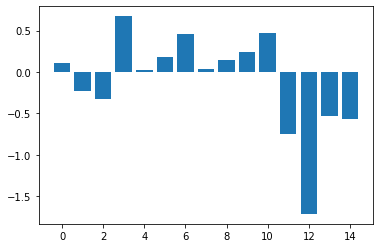

In [ ]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split


X=df[[ 'acousticness', 'danceability',
       'explicit', 'instrumentalness', 'key', 'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y=df['regression_popularity']
sc_1=StandardScaler()
sc_1.fit(X)
X=pd.DataFrame(sc_1.fit_transform(X))

y2 = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.1, random_state=42)
strategy = {4:1000}
oversample = SMOTE(sampling_strategy=strategy)
X_train, y_train = oversample.fit_resample(X_train, y_train)
model = Sequential()
model.add(Dense(64, input_dim = 15 , activation = 'relu'))
model.add(Dense(20, activation = 'relu'))


model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(X_train, y_train, epochs = 15, batch_size = 4)

scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
predictions = model.predict_classes(X_test)
prediction_ = np.argmax(to_categorical(predictions), axis = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/15
2917/2917 [==============================] - 5s 2ms/step - loss: 1.1252 - accuracy: 0.5190
Epoch 2/15
2917/2917 [==============================] - 5s 2ms/step - loss: 0.9866 - accuracy: 0.5725
Epoch 3/15
2917/2917 [==============================] - 5s 2ms/step - loss: 0.9671 - accuracy: 0.5786
Epoch 4/15
2917/2917 [==============================] - 5s 2ms/step - loss: 0.9570 - accuracy: 0.5893
Epoch 5/15
2917/2917 [==============================] - 5s 2ms/step - loss: 0.9569 - accuracy: 0.5898
Epoch 6/15
2917/2917 [==============================] - 5s 2ms/step - loss: 0.9430 - accuracy: 0.5992
Epoch 7/15
2917/2917 [==============================] - 5s 2ms/step - loss: 0.9341 - accuracy: 0.6009
Epoch 8/15
2917/2917 [==============================] - 5s 2ms/step - loss: 0.9365 - accuracy: 0.5991
Epoch 9/15
2917/2917 [==============================] - 5s 2ms/step - loss: 0.9424 - accuracy: 0.5923
Epoch 10/15
2917/2917 [==============================] - 5s 2ms/step - loss: 0.925

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred=prediction_
y_test = np.argmax(y_test,axis=1)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[250  31   8  27   2]
 [ 35 165 109   4   0]
 [ 11  88 159  35   4]
 [ 16  29  81 100  36]
 [  0   0   2  15  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       318
           1       0.53      0.53      0.53       313
           2       0.44      0.54      0.48       297
           3       0.55      0.38      0.45       262
           4       0.28      0.48      0.35        33

    accuracy                           0.56      1223
   macro avg       0.52      0.54      0.52      1223
weighted avg       0.58      0.56      0.57      1223

Accuracy: 0.5641864268192968


In [ ]:
y_test2 = np.argmax(y_test,axis=1)
y_test2

array([0, 0, 0, ..., 0, 1, 3])

In [ ]:
y_test

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
df=pd.read_csv( '/content/drive/MyDrive/OPEN IIT/train3.csv')
df2=df.iloc[-2400:]
df2.head()

,Unnamed: 0,Unnamed: 0.1,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,mode*tempo,month,month_name,regression_popularity,rp>0,rp>1,rp>2,rp>3,year>=2000,year<=1960,year<=1980,year<=2000,year<=2010,year<=2020
9827,9827,9827,6468,0.930,0.336,0.3450,0,0.00175,2,0.232,-13.359,Major,14-04-1986,0.0296,171.688,0.287,1986,3.4,low,171.688,4,April,1,1,0,0,0,0,0,0,1,0,0
9828,9828,9828,16182,0.221,0.738,0.1090,1,0.00000,11,0.212,-17.732,Minor,01-01-1935,0.9220,109.556,0.763,1935,2.9,very low,-109.556,1,January,0,0,0,0,0,0,1,0,0,0,0
9829,9829,9829,450,0.764,0.273,0.2060,0,0.00000,2,0.140,-9.348,Major,01-01-1983,0.0299,173.546,0.128,1983,3.7,low,173.546,1,January,1,1,0,0,0,0,0,0,1,0,0
9830,9830,9830,3951,0.895,0.262,0.0857,0,0.89600,8,0.153,-21.251,Minor,01-01-1990,0.0433,118.926,0.049,1990,2.0,average,-118.926,1,January,2,1,1,0,0,0,0,0,1,0,0
9831,9831,9831,13620,0.478,0.826,0.8230,0,0.00177,6,0.161,-5.816,Major,31-12-2005,0.1150,110.043,0.931,2005,5.6,very low,110.043,12,December,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
len(df2[df2['rp>3'] == 1])

68

In [ ]:
df2.shape

(2400, 33)

In [ ]:
df=df.head(len(df)-2400)

In [ ]:
df.shape

(9827, 33)

In [ ]:
from sklearn.model_selection import train_test_split
X=df[[ 'energy' ,'danceability',
       'explicit', 'instrumentalness','liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y=df['regression_popularity']


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
oversample = SMOTE()

X=df[[ 'loudness', 'danceability',
       'explicit', 'instrumentalness',
       'speechiness', 
       'duration-min', 'year>=2000','year<=2020' ,'year<=2010',
       ]]

y=df['rp>3']
sc_1=StandardScaler()
sc_1.fit(X)
X=pd.DataFrame(sc_1.fit_transform(X)) 

X ,y = oversample.fit_resample(X,y)
 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf = RandomForestClassifier( n_estimators=1000,max_depth=10,random_state=1,class_weight='balanced')
 
clf.fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
X_test=df2[[ 'loudness', 'danceability',
       'explicit', 'instrumentalness',
       'speechiness', 
       'duration-min','year>=2000', 'year<=2020' ,'year<=2010',
       ]]
y_test=df2['rp>3']
sc_1.fit(X_test)
X_test=pd.DataFrame(sc_1.fit_transform(X_test)) 
y_pred1=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred1)
print("Accuracy:",result2)

Confusion Matrix:
[[2082  250]
 [  21   47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2332
           1       0.16      0.69      0.26        68

    accuracy                           0.89      2400
   macro avg       0.57      0.79      0.60      2400
weighted avg       0.97      0.89      0.92      2400

Accuracy: 0.8870833333333333


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
oversample = SMOTE()

X=df[[ 'energy' ,'danceability',
       'explicit', 'instrumentalness','liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y=df['rp>2']
sc_1=StandardScaler()
sc_1.fit(X)
X=pd.DataFrame(sc_1.fit_transform(X)) 

X ,y = oversample.fit_resample(X,y)
 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf = RandomForestClassifier( n_estimators=1000,max_depth=10,random_state=1,class_weight='balanced_subsample')
 
clf.fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [ ]:
X_test=df2[[ 'energy' ,'danceability',
       'explicit', 'instrumentalness','liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y_test=df2['rp>2']
sc_1.fit(X_test)
X_test=pd.DataFrame(sc_1.fit_transform(X_test)) 
y_pred2=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred2)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred2)
print("Accuracy:",result2)

Confusion Matrix:
[[1565  236]
 [ 161  438]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1801
           1       0.65      0.73      0.69       599

    accuracy                           0.83      2400
   macro avg       0.78      0.80      0.79      2400
weighted avg       0.84      0.83      0.84      2400

Accuracy: 0.8345833333333333


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


X=df[[ 'energy' ,'danceability',
       'explicit', 'instrumentalness','liveness',
       'speechiness', 'tempo', 
       'duration-min', 'year<=1960',  'year<=2000', 'year<=2010',
       'year<=2020']]
y=df['rp>1']
sc_1=StandardScaler()
sc_1.fit(X)
X=pd.DataFrame(sc_1.fit_transform(X)) 


 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf = RandomForestClassifier( n_estimators=1000,random_state=1,class_weight='balanced_subsample')
 
clf.fit(X, y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [ ]:
X_test=df2[[ 'energy' ,'danceability',
       'explicit', 'instrumentalness','liveness',
       'speechiness', 'tempo', 
       'duration-min', 'year<=1960', 'year<=2000', 'year<=2010',
       'year<=2020']]
y_test=df2['rp>1']
sc_1.fit(X_test)
X_test=pd.DataFrame(sc_1.fit_transform(X_test)) 
y_pred3=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred3)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred3)
print("Accuracy:",result2)

Confusion Matrix:
[[973 271]
 [252 904]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1244
           1       0.77      0.78      0.78      1156

    accuracy                           0.78      2400
   macro avg       0.78      0.78      0.78      2400
weighted avg       0.78      0.78      0.78      2400

Accuracy: 0.7820833333333334


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


X=df[[ 'energy' ,'danceability',
       'explicit', 'instrumentalness','liveness',
       'speechiness', 'tempo', 
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y=df['rp>0']
sc_1=StandardScaler()
sc_1.fit(X)
X=pd.DataFrame(sc_1.fit_transform(X)) 


 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf = RandomForestClassifier( n_estimators=1000,random_state=1,class_weight='balanced_subsample')
 
clf.fit(X, y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [ ]:
X_test=df2[[ 'energy' ,'danceability',
       'explicit', 'instrumentalness','liveness',
       'speechiness', 'tempo', 
       'duration-min', 'year<=1960','year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y_test=df2['rp>0']
sc_1.fit(X_test)
X_test=pd.DataFrame(sc_1.fit_transform(X_test)) 
y_pred4=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred4)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred4)
print("Accuracy:",result2)

Confusion Matrix:
[[ 467  166]
 [  76 1691]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       633
           1       0.91      0.96      0.93      1767

    accuracy                           0.90      2400
   macro avg       0.89      0.85      0.86      2400
weighted avg       0.90      0.90      0.90      2400

Accuracy: 0.8991666666666667


In [ ]:
y_pred_final=[]
for i in range (2400):
  if (y_pred1[i]==1):
    y_pred_final.append(4)
  elif (y_pred2[i]==1):
    y_pred_final.append(3)
  elif  (y_pred3[i]==1):
    y_pred_final.append(2)
  elif (y_pred4[i]==1):
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)

  




In [ ]:
df2.head()

,Unnamed: 0,Unnamed: 0.1,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,mode*tempo,month,month_name,regression_popularity,rp>0,rp>1,rp>2,rp>3,year>=2000,year<=1960,year<=1980,year<=2000,year<=2010,year<=2020
9827,9827,9827,6468,0.930,0.336,0.3450,0,0.00175,2,0.232,-13.359,Major,14-04-1986,0.0296,171.688,0.287,1986,3.4,low,171.688,4,April,1,1,0,0,0,0,0,0,1,0,0
9828,9828,9828,16182,0.221,0.738,0.1090,1,0.00000,11,0.212,-17.732,Minor,01-01-1935,0.9220,109.556,0.763,1935,2.9,very low,-109.556,1,January,0,0,0,0,0,0,1,0,0,0,0
9829,9829,9829,450,0.764,0.273,0.2060,0,0.00000,2,0.140,-9.348,Major,01-01-1983,0.0299,173.546,0.128,1983,3.7,low,173.546,1,January,1,1,0,0,0,0,0,0,1,0,0
9830,9830,9830,3951,0.895,0.262,0.0857,0,0.89600,8,0.153,-21.251,Minor,01-01-1990,0.0433,118.926,0.049,1990,2.0,average,-118.926,1,January,2,1,1,0,0,0,0,0,1,0,0
9831,9831,9831,13620,0.478,0.826,0.8230,0,0.00177,6,0.161,-5.816,Major,31-12-2005,0.1150,110.043,0.931,2005,5.6,very low,110.043,12,December,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
y_test=df2['regression_popularity']
result = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_final)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_final)
print("Accuracy:",result2)

Confusion Matrix:
[[461  90  15  42  25]
 [ 53 348 189  16   5]
 [ 12 168 229 120  28]
 [  6  51 100 182 192]
 [  1   0   3  17  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       633
           1       0.53      0.57      0.55       611
           2       0.43      0.41      0.42       557
           3       0.48      0.34      0.40       531
           4       0.16      0.69      0.26        68

    accuracy                           0.53      2400
   macro avg       0.49      0.55      0.48      2400
weighted avg       0.57      0.53      0.54      2400

Accuracy: 0.5279166666666667


In [ ]:
y_pred1

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_pred2

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
y_pred3

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
y_pred4

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.base import clone


class OrdinalClassifier():
    
    def __init__(self, clf):
        self.clf = clf
        self.clfs = {}
    
    def fit(self, X, y):
        self.unique_class = np.sort(np.unique(y))
        if self.unique_class.shape[0] > 2:
            for i in range(self.unique_class.shape[0]-1):
                # for each k - 1 ordinal value we fit a binary classification problem
                binary_y = (y > self.unique_class[i]).astype(np.uint8)
                clf = clone(self.clf)
                clf.fit(X, binary_y)
                self.clfs[i] = clf
    
    def predict_proba(self, X):
        clfs_predict = {k:self.clfs[k].predict_proba(X) for k in self.clfs}
        predicted = []
        for i,y in enumerate(self.unique_class):
            if i == 0:
                # V1 = 1 - Pr(y > V1)
                predicted.append(1 - clfs_predict[y][:,1])
            elif y in clfs_predict:
                # Vi = Pr(y > Vi-1) - Pr(y > Vi)
                 predicted.append(clfs_predict[y-1][:,1] - clfs_predict[y][:,1])
            else:
                # Vk = Pr(y > Vk-1)
                predicted.append(clfs_predict[y-1][:,1])
        return np.vstack(predicted).T
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
clf = OrdinalClassifier(RandomForestClassifier(n_estimators=1000,max_depth=8,class_weight='balanced'))
X=df[[ 'energy' ,'danceability',
       'explicit', 'instrumentalness','liveness',
       'speechiness', 'tempo', 
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y=df['regression_popularity']
sc_1=StandardScaler()
sc_1.fit(X)
X=pd.DataFrame(sc_1.fit_transform(X)) 
strategy = {4:2000 }
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
clf.fit(X, y)
y_pred=clf.predict(X_test)
print(y_pred)

X_test=df2[[ 'energy' ,'danceability',
       'explicit', 'instrumentalness','liveness',
       'speechiness', 'tempo', 
       'duration-min', 'year<=1960','year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y_test=df2['regression_popularity']
sc_1.fit(X_test)
X_test=pd.DataFrame(sc_1.fit_transform(X_test)) 
y_pred4=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred4)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred4)
print("Accuracy:",result2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[1 0 1 ... 1 0 4]
Confusion Matrix:
[[532  48   2  17  34]
 [110 485   6   6   4]
 [ 50 341  31  97  38]
 [ 42 132  16 104 237]
 [  2   3   0  11  52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       633
           1       0.48      0.79      0.60       611
           2       0.56      0.06      0.10       557
           3       0.44      0.20      0.27       531
           4       0.14      0.76      0.24        68

    accuracy                           0.50      2400
   macro avg       0.47      0.53      0.40      2400
weighted avg       0.55      0.50      0.45      2400

Accuracy: 0.5016666666666667


In [ ]:

# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils.np_utils import to_categorical


X=df[[ 'acousticness', 'danceability',
       'explicit', 'instrumentalness',  'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y=df['regression_popularity']
sc_1=StandardScaler()
sc_1.fit(X)
X=pd.DataFrame(sc_1.fit_transform(X))
strategy = {4:4000,3:6000,2:8000,1:10000,0:14000}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
y2 = np_utils.to_categorical(y)

model = Sequential()
model.add(Dense(32, input_dim = 14 , activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))

model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(X,y2, epochs = 10, batch_size = 20)



/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (4000) in class 4 will be larger than the number of samples in the majority class (class #0 -> 2589)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (6000) in class 3 will be larger than the number of samples in the majority class (class #0 -> 2589)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (8000) in class 2 will be larger than the number of samples in the majority class (class #0 -> 2589)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (10000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 2589)
  n_sa

Epoch 1/10
10500/10500 [==============================] - 25s 2ms/step - loss: 1.0041 - accuracy: 0.5791
Epoch 2/10
10500/10500 [==============================] - 24s 2ms/step - loss: 0.8764 - accuracy: 0.6277
Epoch 3/10
10500/10500 [==============================] - 24s 2ms/step - loss: 0.8617 - accuracy: 0.6344
Epoch 4/10
10500/10500 [==============================] - 24s 2ms/step - loss: 0.8548 - accuracy: 0.6341
Epoch 5/10
10500/10500 [==============================] - 24s 2ms/step - loss: 0.8485 - accuracy: 0.6375
Epoch 6/10
10500/10500 [==============================] - 24s 2ms/step - loss: 0.8424 - accuracy: 0.6421
Epoch 7/10
10500/10500 [==============================] - 24s 2ms/step - loss: 0.8328 - accuracy: 0.6453
Epoch 8/10
10500/10500 [==============================] - 24s 2ms/step - loss: 0.8263 - accuracy: 0.6460
Epoch 9/10
10500/10500 [==============================] - 24s 2ms/step - loss: 0.8217 - accuracy: 0.6487
Epoch 10/10
10500/10500 [==============================

In [ ]:
X_test=df2[[ 'acousticness', 'danceability',
       'explicit', 'instrumentalness',  'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y_test=df2['regression_popularity']
sc_1.fit(X_test)
X_test=pd.DataFrame(sc_1.fit_transform(X_test))
predictions = model.predict_classes(X_test)
prediction_ = np.argmax(to_categorical(predictions), axis = 1)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred=prediction_


result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[512  63  20  22  16]
 [ 71 341 195   2   2]
 [ 25 172 309  39  12]
 [ 53  61 171 142 104]
 [  6   1   5  24  32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       633
           1       0.53      0.56      0.55       611
           2       0.44      0.55      0.49       557
           3       0.62      0.27      0.37       531
           4       0.19      0.47      0.27        68

    accuracy                           0.56      2400
   macro avg       0.51      0.53      0.49      2400
weighted avg       0.58      0.56      0.55      2400

Accuracy: 0.5566666666666666


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 
  



X=df[[ 'acousticness', 'danceability',
       'explicit', 'instrumentalness', 'key', 'liveness',
       'speechiness', 'tempo', 'valence',
       'duration-min', 'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y=df['regression_popularity']
sc_1=StandardScaler()
sc_1.fit(X)

strategy = {4:1000,3:3000}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
model = RandomForestClassifier( criterion = 'entropy', random_state = 42,class_weight="balanced")
model.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (3000) in class 3 will be larger than the number of samples in the majority class (class #0 -> 2589)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
X_test=df2[[ 'energy' ,'danceability',
       'explicit', 'instrumentalness','liveness',
       'speechiness', 'tempo', 
       'duration-min', 'year<=1960','year<=1980', 'year<=2000', 'year<=2010',
       'year<=2020']]
y_test=df2['regression_popularity']
sc_1.fit(X_test)
X_test=pd.DataFrame(sc_1.fit_transform(X_test)) 
y_pred4=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred4)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred4)
print("Accuracy:",result2)

Confusion Matrix:
[[532  48   2  17  34]
 [110 485   6   6   4]
 [ 50 341  31  97  38]
 [ 42 132  16 104 237]
 [  2   3   0  11  52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       633
           1       0.48      0.79      0.60       611
           2       0.56      0.06      0.10       557
           3       0.44      0.20      0.27       531
           4       0.14      0.76      0.24        68

    accuracy                           0.50      2400
   macro avg       0.47      0.53      0.40      2400
weighted avg       0.55      0.50      0.45      2400

Accuracy: 0.5016666666666667
